The name column in the CSV should have the name of the test algorithm or what ever
followed by the size of the array tested on.

    Example: "merge-sort10000"

NO spaces in the CSV:

    Example: merge-sort10000,8.603332519531250000,7.480468750000000000,,,892.347
    
    NOT:     merge-sort10000 ; 8.603332519531250000 , 7.480468750000000000 , , , 892.347
    
Then simply name your cell:

    print("Merge sort Data 10000 - 100000")

Diffine the sizes of your arrays:

    sizes = [i*10000 for i in range(1,11)]

Calculate mean time for each array:

    s = meanTimePrDataSize(df, "name", sizes)

And plot the graphs:

    showGraphs(df, s)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dfMB = pd.read_csv("JavaSort.csv")


In [3]:
def meanTimePrDataSize(df, name, sizes):
    df.columns = ["Name","PKG","CPU", "GPU" , "DRAM?" , "Time (sec)"]
    d = {}
    for i in range(len(sizes)):
        d[str(sizes[i])] = df[df["Name"] == (name+str(sizes[i]))] ["Time (sec)"].mean()
    
    return pd.Series(data = d)

In [10]:
def showGraphs(df, s):
    sns.set(rc={'figure.figsize':(15,8.27)})
    """
    plt.plot(df["Time (sec)"],".")
    plt.ylabel('time (ms)')
    plt.xlabel('Measurment NO')
    plt.show()
    
    plt.plot(df["CPU"],".")
    plt.ylabel('Energy (CPU) [J]')
    plt.xlabel('Measurement NO')
    plt.show()
    
    plt.plot(s, ".")
    plt.ylabel('Time (ms)')
    plt.xlabel('Array size')
    plt.xticks(rotation = 30)
    plt.show()
    """
    box = sns.boxplot(data=df, x='Name', y = df["CPU"])
    box.set_xticklabels(box.get_xticklabels(),rotation=30)

    plt.show()

    box = sns.boxplot(data=df, x='Name', y = 'Time (sec)')
    box.set_xticklabels(box.get_xticklabels(),rotation=30)

Example javasort Data (25k - 1m)
10000             NaN
20000             NaN
30000             NaN
40000             NaN
50000      934.294097
60000             NaN
70000             NaN
80000             NaN
90000             NaN
100000    1005.773335
dtype: float64


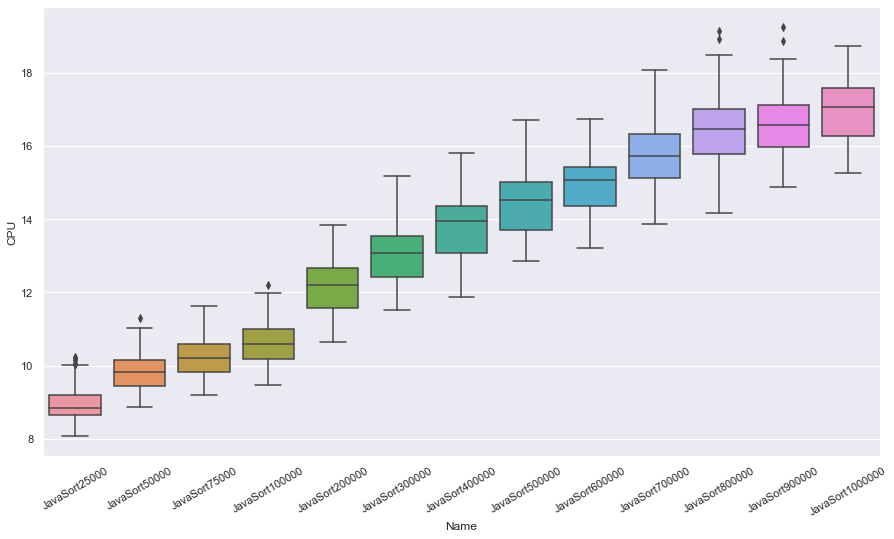

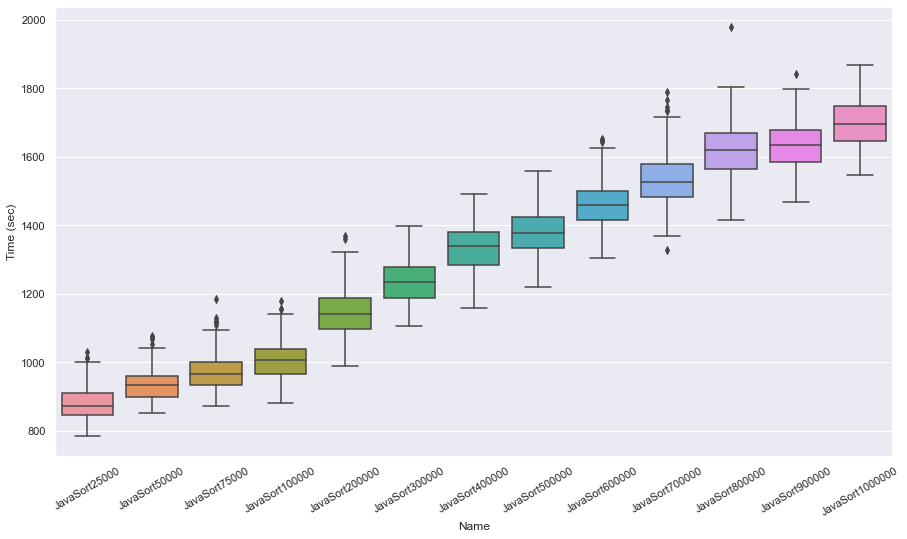

In [11]:
print("Example javasort Data (25k - 1m)")
sizes = [i*10000 for i in range(1,11)]
#print(sizes)
s = meanTimePrDataSize(dfMB, "JavaSort", sizes)
print(s)
showGraphs(dfMB, s)